In [155]:
import numpy as mp
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set
mp.set_printoptions(threshold=10000)
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df_segmentation = pd.read_csv('segmentation data.csv',index_col = 0)
import pickle

In [48]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [49]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [50]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


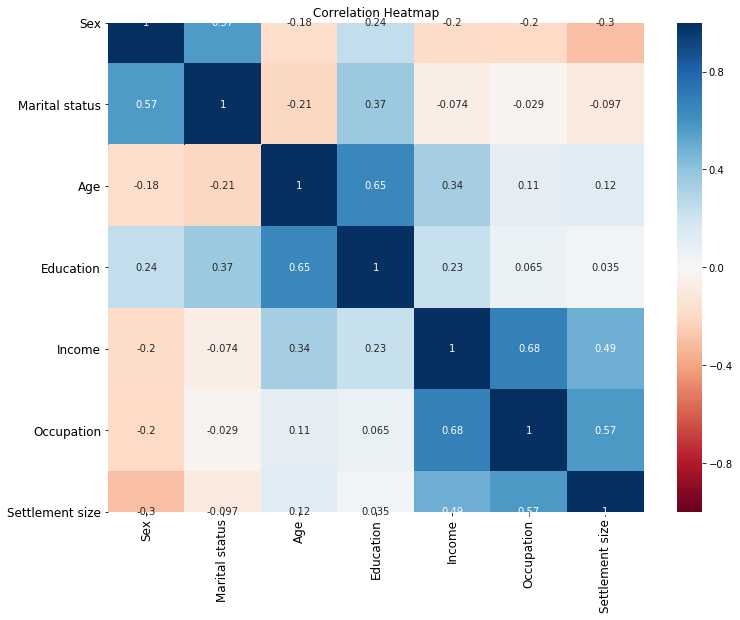

In [51]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_xticklabels(s.get_xticklabels(),rotation = 90,fontsize = 12)
s.set_yticklabels(s.get_yticklabels(),rotation = 0,fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'visualization of raw data')

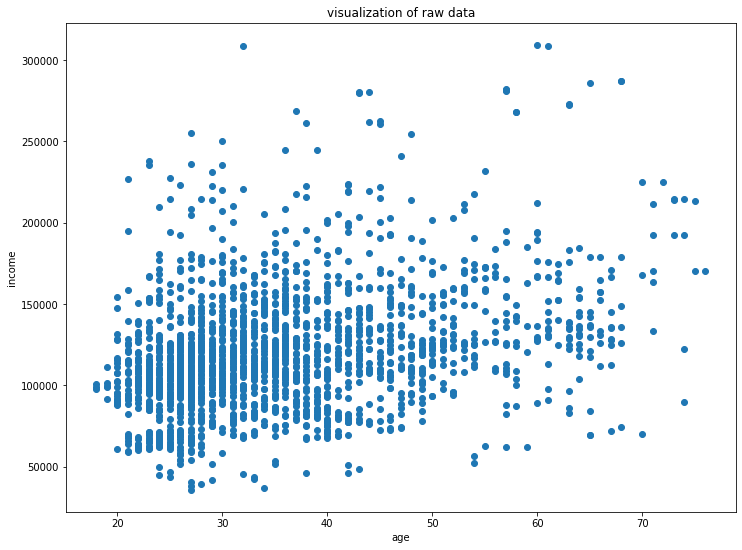

In [52]:
plt.figure(figsize = (12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('age')
plt.ylabel('income')
plt.title('visualization of raw data')


In [53]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

In [54]:
hier_clust = linkage(segmentation_std, method = 'ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [100.0, 100.0, 140.0, 140.0],
  [40.0, 40.0, 120.0, 120.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [180.0, 180.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [260.0, 260.0, 300.0, 300.0],
  [200.0, 200.0, 280.0, 280.0],
  [80.0, 80.0, 240.0, 240.0],
  [325.0, 325.0, 335.0, 335.0],
  [345

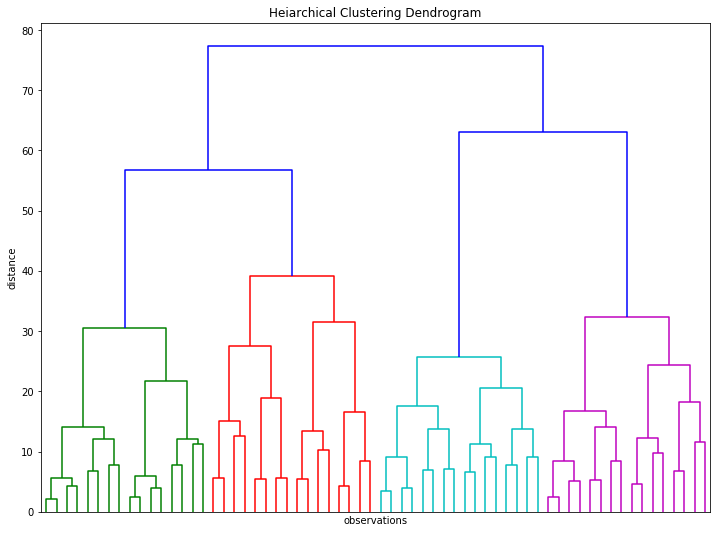

In [58]:
plt.figure(figsize = (12,9))
plt.title('Heiarchical Clustering Dendrogram')
plt.xlabel('observations')
plt.ylabel('distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p=5,
           show_leaf_counts = False,
           no_labels=True,
           )

[[4.78000000e+02 1.95700000e+03 3.41213651e-04 2.00000000e+00]
 [6.73000000e+02 8.21000000e+02 3.93708059e-04 2.00000000e+00]
 [8.67000000e+02 9.33000000e+02 8.92404934e-04 2.00000000e+00]
 [3.51000000e+02 9.54000000e+02 8.92404934e-04 2.00000000e+00]
 [1.36300000e+03 1.84000000e+03 9.18652138e-04 2.00000000e+00]
 [4.52000000e+02 1.24400000e+03 9.71146546e-04 2.00000000e+00]
 [5.20000000e+01 2.45000000e+02 9.97393750e-04 2.00000000e+00]
 [2.39000000e+02 1.22600000e+03 1.04988816e-03 2.00000000e+00]
 [1.58700000e+03 1.67800000e+03 1.15487697e-03 2.00000000e+00]
 [7.52000000e+02 7.83000000e+02 1.25986579e-03 2.00000000e+00]
 [1.00000000e+01 3.85000000e+02 1.39110181e-03 2.00000000e+00]
 [1.74700000e+03 1.99800000e+03 1.54858503e-03 2.00000000e+00]
 [1.55500000e+03 1.84800000e+03 1.75856266e-03 2.00000000e+00]
 [5.48000000e+02 1.96700000e+03 2.25725954e-03 2.00000000e+00]
 [1.89400000e+03 1.89800000e+03 2.46723717e-03 2.00000000e+00]
 [1.77500000e+03 1.78700000e+03 2.57222599e-03 2.000000

In [61]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)
    

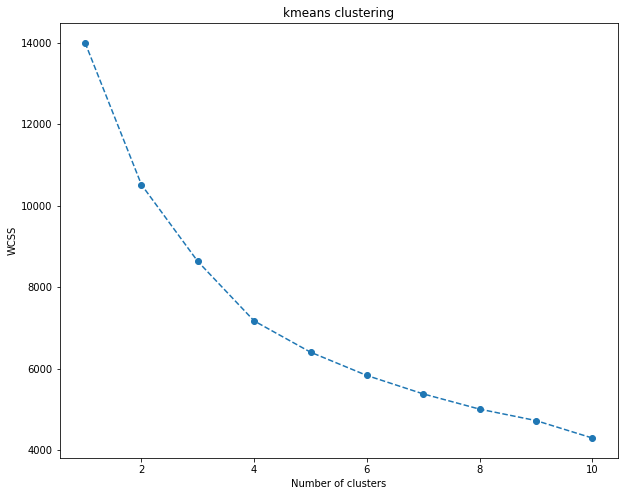

In [63]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('kmeans clustering')
plt.show()

In [64]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [65]:
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [136]:
df_segm_kmeans=df_segmentation.copy()
df_segm_kmeans['segment kmeans']=kmeans.labels_
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment kmeans
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,2
100001998,0,0,31,0,86400,0,0,1


In [68]:
df_segm_analysis = df_segm_kmeans.groupby(['segment kmeans']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment kmeans,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [123]:
df_segm_analysis['n obs']=df_segm_kmeans[['segment kmeans', 'Sex']].groupby(['segment kmeans']).count()

In [75]:
df_segm_analysis['prop ops'] = df_segm_analysis['n obs']/df_segm_analysis['n obs'].sum()

In [76]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,n obs,prop ops
segment kmeans,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [79]:
df_segm_analysis.rename({0:'well off',
                         1: 'limited opportunity',
                        2:'standard',
                        3:'career focused'})


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,n obs,prop ops
segment kmeans,,,,,,,,,
well off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
limited opportunity,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [81]:
df_segm_kmeans['labels']=df_segm_kmeans['segment kmeans'].map({0:'well off',
                                                                 1: 'limited opportunity',
                        2:'standard',
                        3:'career focused'})

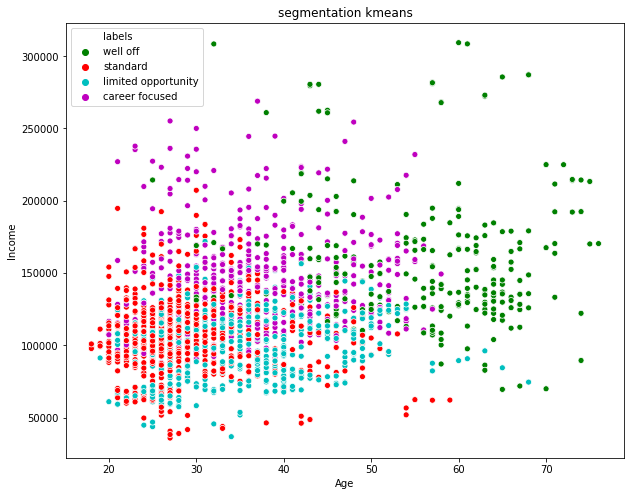

In [85]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('segmentation kmeans')
plt.show()

In [90]:
pca = PCA()

In [91]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [92]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'cumulative explained variance')

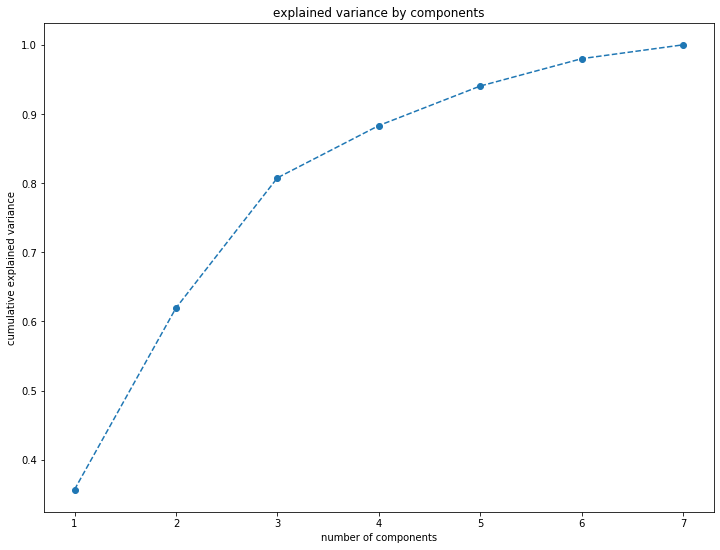

In [95]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [96]:
pca = PCA(n_components = 3)
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [97]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [99]:
df_pca_comp = pd.DataFrame(data = pca.components_, 
                           columns = df_segmentation.columns.values,
                           index = ['component 1', 'component 2', 'component3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x214b176d448>,
 <a list of 3 Text yticklabel objects>)

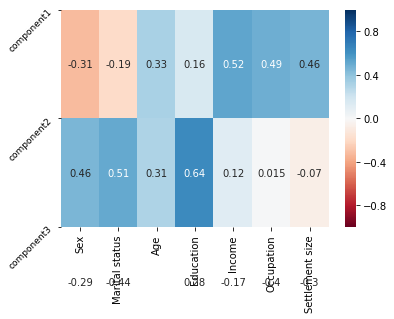

In [101]:
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
            cmap = 'RdBu',
           annot = True)
plt.yticks([0,1,2],['component1','component2','component3'],
          rotation = 45,
          fontsize = 9)

In [102]:
scores_pca = pca.transform(segmentation_std)

In [103]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

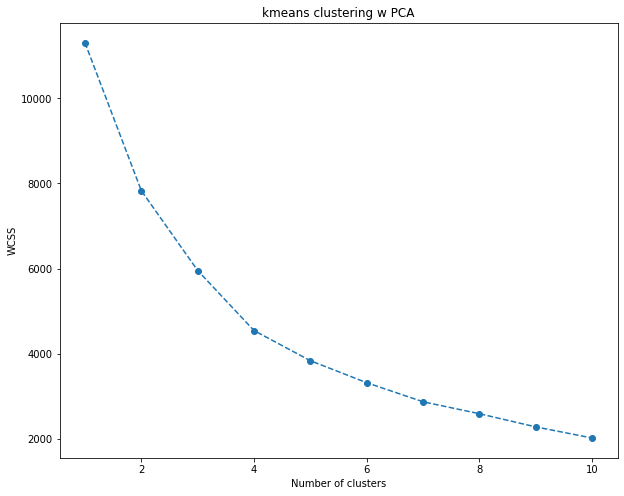

In [104]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('kmeans clustering w PCA')
plt.show()

In [107]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [143]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True),pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:] = ['component1', 'component2', 'component3']
df_segm_pca_kmeans['Segment kmeans pca'] = kmeans_pca.labels_

In [144]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component1,component2,component3,Segment kmeans pca
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [145]:
def_seg_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment kmeans pca']).mean()
def_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component1,component2,component3
Segment kmeans pca,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [146]:
def_seg_pca_kmeans_freq['n obs']=df_segm_pca_kmeans[['Sex','Segment kmeans pca']].groupby(['Segment kmeans pca']).count()
def_seg_pca_kmeans_freq['prop ops'] = def_seg_pca_kmeans_freq['n obs']/def_seg_pca_kmeans_freq['n obs'].sum()
def_seg_pca_kmeans_freq=def_seg_pca_kmeans_freq.rename({0:'standard',
                                                        1:'career focused',
                                                        2:'fewer opportunities',
                                                        3:'well off'})
def_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component1,component2,component3,n obs,prop ops
Segment kmeans pca,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [150]:
df_segm_pca_kmeans['legend'] = df_segm_pca_kmeans['Segment kmeans pca'].map({0:'standard',
                                                                            1:'career focused',
                                                                            2:'fewer opportunities',
                                                                            3:'well off'})

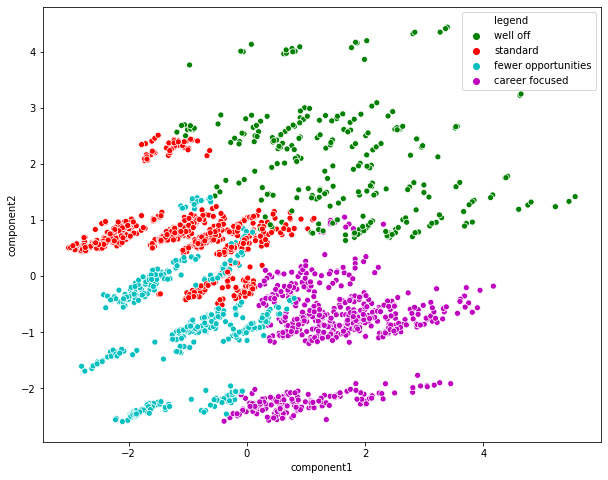

In [151]:
x_axis = df_segm_pca_kmeans['component1']
y_axis = df_segm_pca_kmeans['component2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, df_segm_pca_kmeans['legend'], palette = ['g','r','c','m'])
plt.title = ('clusters by pca components')
plt.show()

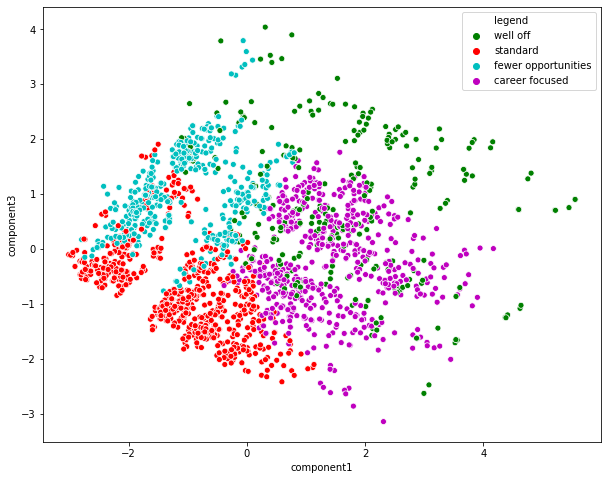

In [152]:
x_axis = df_segm_pca_kmeans['component1']
y_axis = df_segm_pca_kmeans['component3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, df_segm_pca_kmeans['legend'], palette = ['g','r','c','m'])
plt.title = ('clusters by pca components')
plt.show()

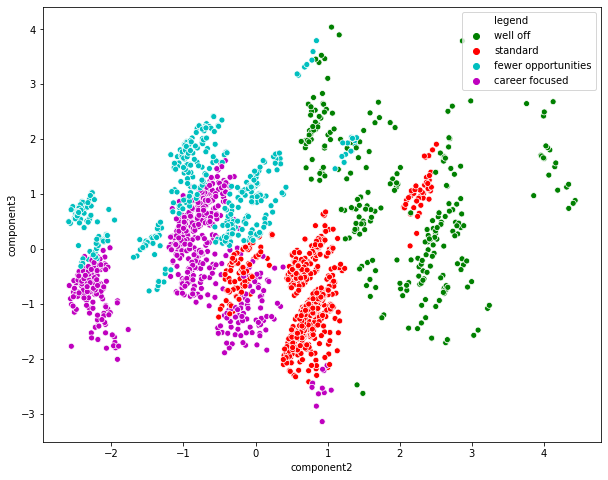

In [153]:
x_axis = df_segm_pca_kmeans['component2']
y_axis = df_segm_pca_kmeans['component3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, df_segm_pca_kmeans['legend'], palette = ['g','r','c','m'])
plt.title = ('clusters by pca components')
plt.show()

In [157]:
pickle.dump(scaler,open('scalar.pickle','wb'))
pickle.dump(pca,open('pca.pickle','wb'))
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))